In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../dataset/crowd_data/crowd_data.tsv'

crowd_data = pd.read_csv(file_path, sep='\t')
crowd_data['LifetimeApprovalRate'] = crowd_data['LifetimeApprovalRate'].str.rstrip('%').astype('float') / 100

In [2]:
crowd_data

,HITId,HITTypeId,Title,Reward,AssignmentId,WorkerId,AssignmentStatus,WorkTimeInSeconds,LifetimeApprovalRate,Input1ID,Input2ID,Input3ID,AnswerID,AnswerLabel,FixPosition,FixValue
0,1,7QT,Is this triple correct or incorrect?,$0.50,1,2133ICYWE97,Submitted,60,0.99,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,NaN,NaN
1,1,7QT,Is this triple correct or incorrect?,$0.50,2,2133U7HKDLO,Submitted,40,0.40,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,yes,yes
2,1,7QT,Is this triple correct or incorrect?,$0.50,3,928UJANWZ12,Submitted,50,0.98,wd:Q11621,wdt:P2142,792910554,2.0,INCORRECT,NaN,NaN
3,1,7QT,Is this triple correct or incorrect?,$0.50,4,1726JMZQW,Submitted,80,0.70,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,NaN,NaN
4,1,7QT,Is this triple correct or incorrect?,$0.50,5,2134U7HKDMM,Submitted,2,0.70,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,61,9QT,Is this triple correct or incorrect?,$0.50,301,AALKMII97,Submitted,240,0.98,wd:Q1288004,wdt:P1412,wd:Q13330,2.0,INCORRECT,Object,Q1860
301,61,9QT,Is this triple correct or incorrect?,$0.50,302,HHCKW1111,Submitted,200,0.80,wd:Q1288004,wdt:P1412,wd:Q13330,1.0,CORRECT,NaN,NaN
302,61,9QT,Is this triple correct or incorrect?,$0.50,303,GGUI83657S,Submitted,120,0.85,wd:Q1288004,wdt:P1412,wd:Q13330,1.0,CORRECT,NaN,NaN
303,61,9QT,Is this triple correct or incorrect?,$0.50,304,WWHL098SA43,Submitted,10,0.69,wd:Q1288004,wdt:P1412,wd:Q13330,2.0,INCORRECT,NaN,NaN


## Data Exploration

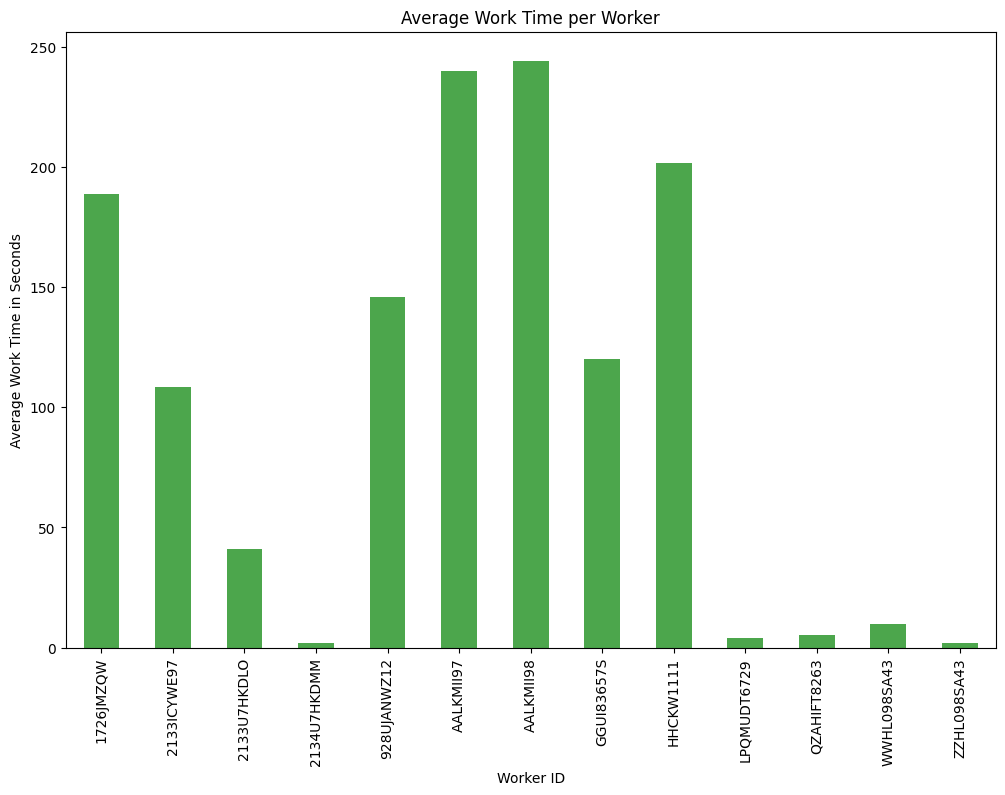

In [3]:
# Grouping data by WorkerId and calculating the average WorkTimeInSeconds for each worker
average_work_time_per_worker = crowd_data.groupby('WorkerId')['WorkTimeInSeconds'].mean()

# Plotting the average work time for each worker
plt.figure(figsize=(12, 8))
average_work_time_per_worker.plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Work Time per Worker')
plt.xlabel('Worker ID')
plt.ylabel('Average Work Time in Seconds')
plt.xticks(rotation=90)  # Rotating x-axis labels for better visibility
plt.show()

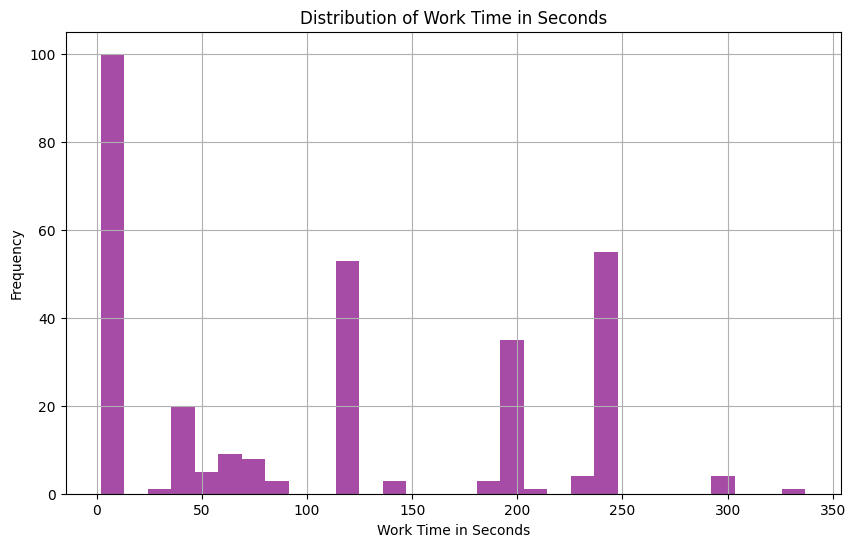

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(crowd_data['WorkTimeInSeconds'], bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Work Time in Seconds')
plt.xlabel('Work Time in Seconds')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

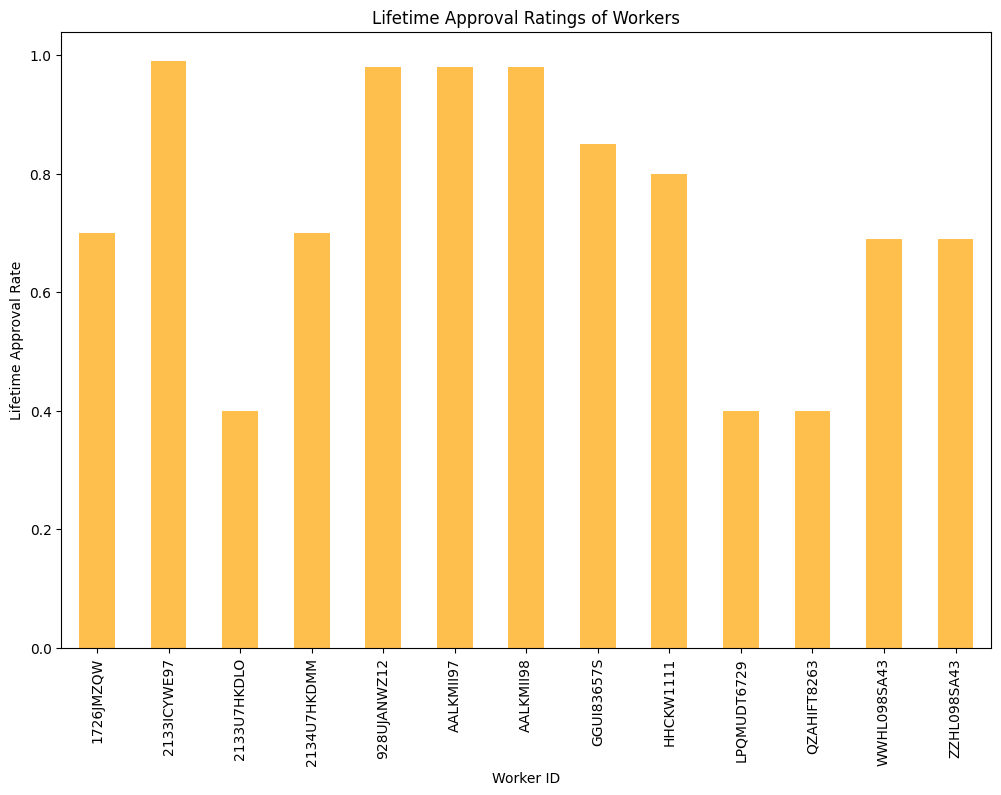

In [5]:
# Plotting the Lifetime Approval Rate for each worker
worker_ratings = crowd_data.groupby('WorkerId')['LifetimeApprovalRate'].mean()

# Creating the plot
plt.figure(figsize=(12, 8))
worker_ratings.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Lifetime Approval Ratings of Workers')
plt.xlabel('Worker ID')
plt.ylabel('Lifetime Approval Rate')
plt.xticks(rotation=90)  # Rotating x-axis labels for better visibility
plt.show()


## Cleaning

In [6]:
# Remove works with a Approval Rate lower than .5
crowd_data = crowd_data[crowd_data['LifetimeApprovalRate'] >= 0.5]

In [7]:
# Calculating the average work time for each worker
average_work_time = crowd_data.groupby('WorkerId')['WorkTimeInSeconds'].mean()

# Identifying workers with average work time less than 35 seconds
workers_to_remove = average_work_time[average_work_time < 35].index

# Removing these workers from the dataset
crowd_data = crowd_data[~crowd_data['WorkerId'].isin(workers_to_remove)]


In [8]:
tasks_solved_quickly = crowd_data[crowd_data['WorkTimeInSeconds'] < 10]

In [9]:
fixes = crowd_data[(crowd_data['AnswerLabel'] == 'INCORRECT') & (crowd_data['FixValue'].notna())]
fixes

,HITId,HITTypeId,Title,Reward,AssignmentId,WorkerId,AssignmentStatus,WorkTimeInSeconds,LifetimeApprovalRate,Input1ID,Input2ID,Input3ID,AnswerID,AnswerLabel,FixPosition,FixValue
10,3,7QT,Is this triple correct or incorrect?,$0.50,11,2133ICYWE97,Submitted,140,0.99,wd:Q16911843,wdt:P577,2014-01-18,2.0,INCORRECT,Object,2014-02-18
28,6,7QT,Is this triple correct or incorrect?,$0.50,29,2133ICYWE97,Submitted,120,0.99,wd:Q48313910,wdt:P577,2018-02-24,2.0,INCORRECT,Object,2019-02-24
36,8,7QT,Is this triple correct or incorrect?,$0.50,37,928UJANWZ12,Submitted,240,0.98,wd:Q217010,wdt:P2142,698491347,2.0,INCORRECT,Object,698491348
51,11,7QT,Is this triple correct or incorrect?,$0.50,52,928UJANWZ12,Submitted,240,0.98,wd:Q1339195,ddis:indirectSubclassOf,wd:Q27096213,2.0,INCORRECT,Object,wd:Q72
60,13,7QT,Is this triple correct or incorrect?,$0.50,61,2133ICYWE97,Submitted,120,0.99,wd:Q61928601,ddis:indirectSubclassOf,wd:Q95074,2.0,INCORRECT,Object,wd:Q94074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,57,9QT,Is this triple correct or incorrect?,$0.50,282,HHCKW1111,Submitted,200,0.80,wd:Q223596,wdt:P1431,wd:Q457180,2.0,INCORRECT,Object,Q181900
285,58,9QT,Is this triple correct or incorrect?,$0.50,286,AALKMII97,Submitted,240,0.98,wd:Q943992,wdt:P161,wd:Q160432,2.0,INCORRECT,Object,Q7360827
291,59,9QT,Is this triple correct or incorrect?,$0.50,292,HHCKW1111,Submitted,200,0.80,wd:Q1893555,wdt:P272,wd:Q48784114,2.0,INCORRECT,Object,Q7488442
295,60,9QT,Is this triple correct or incorrect?,$0.50,296,AALKMII97,Submitted,240,0.98,wd:Q21060270,wdt:P27,wd:Q916,2.0,INCORRECT,Object,Q884


In [10]:
crowd_data

,HITId,HITTypeId,Title,Reward,AssignmentId,WorkerId,AssignmentStatus,WorkTimeInSeconds,LifetimeApprovalRate,Input1ID,Input2ID,Input3ID,AnswerID,AnswerLabel,FixPosition,FixValue
0,1,7QT,Is this triple correct or incorrect?,$0.50,1,2133ICYWE97,Submitted,60,0.99,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,NaN,NaN
2,1,7QT,Is this triple correct or incorrect?,$0.50,3,928UJANWZ12,Submitted,50,0.98,wd:Q11621,wdt:P2142,792910554,2.0,INCORRECT,NaN,NaN
3,1,7QT,Is this triple correct or incorrect?,$0.50,4,1726JMZQW,Submitted,80,0.70,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,NaN,NaN
6,2,7QT,Is this triple correct or incorrect?,$0.50,7,2133ICYWE97,Submitted,120,0.99,wd:Q603545,wdt:P2142,4300000,1.0,CORRECT,NaN,NaN
7,2,7QT,Is this triple correct or incorrect?,$0.50,8,928UJANWZ12,Submitted,60,0.98,wd:Q603545,wdt:P2142,4300000,1.0,CORRECT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,60,9QT,Is this triple correct or incorrect?,$0.50,297,HHCKW1111,Submitted,200,0.80,wd:Q21060270,wdt:P27,wd:Q916,1.0,CORRECT,NaN,NaN
297,60,9QT,Is this triple correct or incorrect?,$0.50,298,GGUI83657S,Submitted,120,0.85,wd:Q21060270,wdt:P27,wd:Q916,1.0,CORRECT,NaN,NaN
300,61,9QT,Is this triple correct or incorrect?,$0.50,301,AALKMII97,Submitted,240,0.98,wd:Q1288004,wdt:P1412,wd:Q13330,2.0,INCORRECT,Object,Q1860
301,61,9QT,Is this triple correct or incorrect?,$0.50,302,HHCKW1111,Submitted,200,0.80,wd:Q1288004,wdt:P1412,wd:Q13330,1.0,CORRECT,NaN,NaN


## Support Votes

In [11]:
answer_distribution = crowd_data.groupby('HITId')['AnswerLabel'].value_counts().unstack(fill_value=0)
# # Adding a column for the majority vote
answer_distribution['MajorityVote'] = answer_distribution.idxmax(axis=1)

# Aggregating FixValue for each HITId
fix_values = crowd_data.groupby('HITId')['FixValue'].agg(lambda x: ', '.join(x.dropna().unique()))

# New code for aggregating FixPosition
fix_positions = crowd_data.groupby('HITId')['FixPosition'].agg(lambda x: ', '.join(x.dropna().unique()))

# Merging FixValue and FixPosition with the answer_distribution table
answer_distribution_with_fixes = answer_distribution.merge(fix_values, on='HITId', how='left').merge(fix_positions,
                                                                                                     on='HITId',
                                                                                                     how='left')

# Extracting the necessary input columns (Input1ID, Input2ID, Input3ID) for each HITId
input_columns = crowd_data[['HITId', 'Input1ID', 'Input2ID', 'Input3ID']].drop_duplicates()

# Merging the input columns with the answer distribution table
answer_distribution_with_inputs = answer_distribution_with_fixes.merge(input_columns, on='HITId', how='left')

answer_distribution_with_inputs[answer_distribution_with_inputs['MajorityVote'] == "CORRECT"]


,HITId,CORRECT,INCORRECT,MajorityVote,FixValue,FixPosition,Input1ID,Input2ID,Input3ID
0,1,2,1,CORRECT,,,wd:Q11621,wdt:P2142,792910554
1,2,3,0,CORRECT,,,wd:Q603545,wdt:P2142,4300000
2,3,2,1,CORRECT,2014-02-18,Object,wd:Q16911843,wdt:P577,2014-01-18
4,5,3,0,CORRECT,,,wd:Q1628022,wdt:P577,1951-01-01
6,7,2,1,CORRECT,,Object,wd:Q171300,wdt:P2142,267000000
10,11,2,1,CORRECT,wd:Q72,Object,wd:Q1339195,ddis:indirectSubclassOf,wd:Q27096213
11,12,3,0,CORRECT,,,wd:Q104649845,ddis:indirectSubclassOf,wd:Q43229
12,13,2,1,CORRECT,wd:Q94074,Object,wd:Q61928601,ddis:indirectSubclassOf,wd:Q95074
14,15,3,0,CORRECT,,,wd:Q8275050,ddis:indirectSubclassOf,wd:Q47461344
15,16,2,1,CORRECT,,,wd:Q17710986,ddis:indirectSubclassOf,wd:Q7725310


In [21]:
answer_distribution_with_inputs

,HITId,CORRECT,INCORRECT,MajorityVote,FixValue,FixPosition,Input1ID,Input2ID,Input3ID
0,1,2,1,CORRECT,,,wd:Q11621,wdt:P2142,792910554
1,2,3,0,CORRECT,,,wd:Q603545,wdt:P2142,4300000
2,3,2,1,CORRECT,2014-02-18,Object,wd:Q16911843,wdt:P577,2014-01-18
3,4,0,3,INCORRECT,,Object,wd:Q132863,wdt:P2142,969023261
4,5,3,0,CORRECT,,,wd:Q1628022,wdt:P577,1951-01-01
...,...,...,...,...,...,...,...,...,...
56,57,2,1,CORRECT,Q181900,Object,wd:Q223596,wdt:P1431,wd:Q457180
57,58,0,3,INCORRECT,Q7360827,Object,wd:Q943992,wdt:P161,wd:Q160432
58,59,2,1,CORRECT,Q7488442,Object,wd:Q1893555,wdt:P272,wd:Q48784114
59,60,2,1,CORRECT,Q884,Object,wd:Q21060270,wdt:P27,wd:Q916


## Fleiss Kappa

In [12]:

from statsmodels.stats.inter_rater import fleiss_kappa

contingency_tables_latest = crowd_data.groupby(['HITTypeId', 'HITId'])['AnswerLabel'].value_counts().unstack(
    fill_value=0)

# Calculating Fleiss' kappa for each HITTypeId
fleiss_kappa_per_batch = contingency_tables_latest.groupby(level=0).apply(fleiss_kappa)

fleiss_kappa_per_batch.head()  # Displaying Fleiss' kappa for each batch



HITTypeId
7QT    0.236364
8QT    0.040000
9QT    0.199110
dtype: float64

## Do the fixes

In [13]:
import pickle
import rdflib

graph = rdflib.Graph().parse(f'../dataset/ddis-movie-graph.nt', format="turtle")

In [14]:
to_fix = answer_distribution_with_inputs[answer_distribution_with_inputs['MajorityVote'] == "INCORRECT"]
to_fix

,HITId,CORRECT,INCORRECT,MajorityVote,FixValue,FixPosition,Input1ID,Input2ID,Input3ID
3,4,0,3,INCORRECT,,Object,wd:Q132863,wdt:P2142,969023261
5,6,1,2,INCORRECT,2019-02-24,Object,wd:Q48313910,wdt:P577,2018-02-24
7,8,0,3,INCORRECT,698491348,Object,wd:Q217010,wdt:P2142,698491347
8,9,0,3,INCORRECT,,,wd:Q4993462,wdt:P577,2008-08-29
9,10,1,2,INCORRECT,,,wd:Q7033842,wdt:P577,1996-06-01
13,14,0,3,INCORRECT,,,wd:Q1004,ddis:indirectSubclassOf,wd:Q47461344
16,17,1,2,INCORRECT,wd:Q95073,Object,wd:Q16101952,ddis:indirectSubclassOf,wd:Q95074
18,19,1,2,INCORRECT,,,wd:Q15715406,ddis:indirectSubclassOf,wd:Q27096213
19,20,1,2,INCORRECT,,,wd:Q15239622,ddis:indirectSubclassOf,wd:Q27096213
20,21,1,2,INCORRECT,,,wd:Q708135,ddis:indirectSubclassOf,wd:Q618779


In [15]:
import re
from rdflib import Graph, URIRef, Literal, XSD

# Apply the fixes
for index, row in to_fix.iterrows():
    print("__")
    # Extract subject, predicate, old object, and new object
    subject = rdflib.URIRef(row['Input1ID'].replace("wd:", "http://www.wikidata.org/entity/"))
    predicate = rdflib.URIRef(row['Input2ID'].replace("wdt:", "http://www.wikidata.org/prop/direct/").replace("ddis:",
                                                                                                              "http://ddis.ch/atai/"))
    old_object = rdflib.URIRef(row['Input3ID'].replace("wd:", "http://www.wikidata.org/entity/"))
    if "wd:" in row['Input3ID']:

        old_object = rdflib.URIRef(row['Input3ID'].replace("wd:", "http://www.wikidata.org/entity/"))

    else:
        pattern = r'\d{4}-\d{2}-\d{2}'
        if re.fullmatch(pattern, row['Input3ID']):
            print("MAATCH",old_object)
            
            old_object = rdflib.Literal(row['Input3ID'], datatype=XSD.date)
        else:
            print("NOO MAATCH",old_object)
            old_object = rdflib.Literal(row['Input3ID'])

    if "wd:" in row['FixValue']:
        fix_value = rdflib.URIRef(str(row['FixValue']).replace("wd:", "http://www.wikidata.org/entity/")) if pd.notna(
            row['FixValue']) else None
    elif "P" or "Q" in row['FixValue']:
        fix_value = rdflib.URIRef(str(row['FixValue']).replace("Q", "http://www.wikidata.org/entity/Q").replace("P",
                                                                                                                "http://www.wikidata.org/prop/direct/P")) if pd.notna(
            row['FixValue']) else None
    else:
        fix_value = rdflib.Literal(row['FixValue']) if pd.notna(row['FixValue']) else None

    # Remove the old triple and add the new one if a fix value is provided
    if fix_value:

        if row['FixPosition'] == "Subject":
            graph.remove((subject, predicate, old_object))
            print((fix_value, predicate, old_object))
            
            graph.add((fix_value, predicate, old_object))
        elif row['FixPosition'] == "Predicate":
            graph.remove((subject, predicate, old_object))
            graph.add((subject, fix_value, old_object))
        else:
            # print(subject, predicate, old_object)
            graph.remove((subject, predicate, old_object))
            graph.add((subject, predicate, fix_value))


# Save the updated graph
# Replace with your desired output path




__
NOO MAATCH 969023261
__
MAATCH 2018-02-24
__
NOO MAATCH 698491347
__
MAATCH 2008-08-29
__
MAATCH 1996-06-01
__
__
__
__
__
__
MAATCH 2010-10-01
__
MAATCH 2001-01-01
__
NOO MAATCH 176997186
__
MAATCH 2010-10-01
__
NOO MAATCH 863756050
__
__
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q1168152'), rdflib.term.URIRef('http://www.wikidata.org/prop/direct/P161'), rdflib.term.URIRef('http://www.wikidata.org/entity/Q105825'))
__
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q908556'), rdflib.term.URIRef('http://www.wikidata.org/prop/direct/P161'), rdflib.term.URIRef('http://www.wikidata.org/entity/Q17386547'))
__
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q1471671'), rdflib.term.URIRef('http://www.wikidata.org/prop/direct/P495'), rdflib.term.URIRef('http://www.wikidata.org/entity/Q30'))
__
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q1722254'), rdflib.term.URIRef('http://www.wikidata.org/prop/direct/P750'), rdflib.term.URIRef('http://www.wikidata.org/entity/Q9

In [16]:
just_add = answer_distribution_with_inputs[answer_distribution_with_inputs['MajorityVote'] == "CORRECT"]
just_add



,HITId,CORRECT,INCORRECT,MajorityVote,FixValue,FixPosition,Input1ID,Input2ID,Input3ID
0,1,2,1,CORRECT,,,wd:Q11621,wdt:P2142,792910554
1,2,3,0,CORRECT,,,wd:Q603545,wdt:P2142,4300000
2,3,2,1,CORRECT,2014-02-18,Object,wd:Q16911843,wdt:P577,2014-01-18
4,5,3,0,CORRECT,,,wd:Q1628022,wdt:P577,1951-01-01
6,7,2,1,CORRECT,,Object,wd:Q171300,wdt:P2142,267000000
10,11,2,1,CORRECT,wd:Q72,Object,wd:Q1339195,ddis:indirectSubclassOf,wd:Q27096213
11,12,3,0,CORRECT,,,wd:Q104649845,ddis:indirectSubclassOf,wd:Q43229
12,13,2,1,CORRECT,wd:Q94074,Object,wd:Q61928601,ddis:indirectSubclassOf,wd:Q95074
14,15,3,0,CORRECT,,,wd:Q8275050,ddis:indirectSubclassOf,wd:Q47461344
15,16,2,1,CORRECT,,,wd:Q17710986,ddis:indirectSubclassOf,wd:Q7725310


In [17]:
just_add = answer_distribution_with_inputs[answer_distribution_with_inputs['MajorityVote'] == "CORRECT"]

for index, row in just_add.iterrows():
    # Extract subject, predicate, old object, and new object
    subject = rdflib.URIRef(row['Input1ID'].replace("wd:", "http://www.wikidata.org/entity/"))
    predicate = rdflib.URIRef(row['Input2ID'].replace("wdt:", "http://www.wikidata.org/prop/direct/").replace("ddis:",
                                                                                                              "http://ddis.ch/atai/"))
    object = rdflib.URIRef(row['Input3ID'].replace("wd:", "http://www.wikidata.org/entity/"))
    print(subject, predicate, object)
    graph.add((subject, predicate, object))

http://www.wikidata.org/entity/Q11621 http://www.wikidata.org/prop/direct/P2142 792910554
http://www.wikidata.org/entity/Q603545 http://www.wikidata.org/prop/direct/P2142 4300000
http://www.wikidata.org/entity/Q16911843 http://www.wikidata.org/prop/direct/P577 2014-01-18
http://www.wikidata.org/entity/Q1628022 http://www.wikidata.org/prop/direct/P577 1951-01-01
http://www.wikidata.org/entity/Q171300 http://www.wikidata.org/prop/direct/P2142 267000000
http://www.wikidata.org/entity/Q1339195 http://ddis.ch/atai/indirectSubclassOf http://www.wikidata.org/entity/Q27096213
http://www.wikidata.org/entity/Q104649845 http://ddis.ch/atai/indirectSubclassOf http://www.wikidata.org/entity/Q43229
http://www.wikidata.org/entity/Q61928601 http://ddis.ch/atai/indirectSubclassOf http://www.wikidata.org/entity/Q95074
http://www.wikidata.org/entity/Q8275050 http://ddis.ch/atai/indirectSubclassOf http://www.wikidata.org/entity/Q47461344
http://www.wikidata.org/entity/Q17710986 http://ddis.ch/atai/indirec

In [18]:
from rdflib import Graph, URIRef, Literal, XSD
# 
# subject = URIRef("http://www.wikidata.org/entity/Q1720855")
# predicate = URIRef("http://www.wikidata.org/prop/direct/P577")
# object = Literal("2010-10-01", datatype=XSD.date)
# 
# graph.remove((subject, predicate, object))

In [19]:

query_template = """PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
            PREFIX wd: <http://www.wikidata.org/entity/>
            PREFIX wdt: <http://www.wikidata.org/prop/direct/>
            PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
            PREFIX ddis: <http://ddis.ch/atai/>
            SELECT ?value
WHERE {
    wd:Q7033842 wdt:P577 ?value .
}
            """
result = graph.query(query_template)
for row in result:
    print(row)

In [20]:
import pickle

with open("updated_dataset.pickle", "wb") as f:
    pickle.dump(graph, f, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
 df = pd.read_csv("/home/oliver/dev/uzh/atai_bot/dataset/crowd_data/crowd-sourcing-output.csv",header=0)
df.drop(['Unnamed: 0','MajorityVote','FixValue',"FixPosition",], axis=1, inplace=True)
df.to_csv("/home/oliver/dev/uzh/atai_bot/dataset/crowd_data/crowd-sourcing-output.csv")